In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import os

# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
timesteps = seq_length = 7
data_dim = 5

In [3]:
# Open,High,Low,Close,Volume
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

In [4]:
# very important. It does not work without it.
scaler = MinMaxScaler(feature_range=(0, 1))
xy = scaler.fit_transform(xy)

In [5]:
x = xy
y = xy[:, [-1]]  # Close as label

In [6]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.13472008 0.13172819 0.14519955 0.13578919 0.13936975]] -> [0.14362484]
[[0.11758487 0.12216082 0.12477034 0.12407457 0.12951873]
 [0.10665704 0.11311388 0.12770471 0.13941024 0.12322359]
 [0.13684729 0.13343352 0.14378508 0.19864659 0.13100512]
 [0.12530735 0.13505217 0.14102689 0.1522273  0.13616385]
 [0.12924145 0.1387519  0.14977719 0.15972035 0.14143888]
 [0.13472008 0.13172819 0.14519955 0.13578919 0.13936975]
 [0.13396226 0.13302877 0.14390253 0.10221386 0.14362484]] -> [0.12022156]
[[0.10665704 0.11311388 0.12770471 0.13941024 0.12322359]
 [0.13684729 0.13343352 0.14378508 0.19864659 0.13100512]
 [0.12530735 0.13505217 0.14102689 0.1522273  0.13616385]
 [0.12924145 0.1387519  0.14977719 0.15972035 0.14143888]
 [0.13472008 0.13172819 0.14519955 0.13578919 0.13936975]
 [0.13396226 0.13302877 0.14390253 0.10221386 0.14362484]
 [0.12895002 0.13132344 0.12999344 0.1888859  0.12022156]] -> [0.12007584]
[[0.13684729 0.13343352 0.14378508 0.19864659 0.13100512]
 [0.12530735 0.135052

 [0.36454884 0.37518031 0.38105175 0.12239849 0.38825675]] -> [0.3808831]
[[0.35653503 0.3576355  0.33821278 0.15700457 0.3313666 ]
 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]
 [0.3688325  0.37731918 0.3581049  0.15185086 0.35022302]
 [0.34516993 0.37049768 0.36347486 0.17006364 0.37537475]
 [0.36454884 0.37518031 0.38105175 0.12239849 0.38825675]
 [0.38188784 0.37541141 0.38694988 0.15186878 0.3808831 ]] -> [0.41556515]
[[0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]
 [0.3688325  0.37731918 0.3581049  0.15185086 0.35022302]
 [0.34516993 0.37049768 0.36347486 0.17006364 0.37537475]
 [0.36454884 0.37518031 0.38105175 0.12239849 0.38825675]
 [0.38188784 0.37541141 0.38694988 0.15186878 0.3808831 ]
 [0.38480195 0.41252434 0.39971453 0.18611634 0.41556515]] -> [0.41801319]
[[0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]
 [0.3688325  0.3773191

 [0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]] -> [0.6347901]
[[0.66822847 0.6722854  0.68376225 0.14123868 0.68701719]
 [0.66505201 0.67508901 0.68891496 0.08792686 0.6878915 ]
 [0.65514396 0.66453912 0.67158451 0.10831765 0.66116585]
 [0.6465183  0.6632384  0.67181931 0.11212692 0.65810571]
 [0.64643079 0.6546538  0.66187173 0.11635744 0.65784351]
 [0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]
 [0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]] -> [0.58046468]
[[0.66505201 0.67508901 0.68891496 0.08792686 0.6878915 ]
 [0.65514396 0.66453912 0.67158451 0.10831765 0.66116585]
 [0.6465183  0.6632384  0.67181931 0.11212692 0.65810571]
 [0.64643079 0.6546538  0.66187173 0.11635744 0.65784351]
 [0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]
 [0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]
 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]] -> [0.58626459]
[[0.65514396 0.66453912 0.67158451 0.10831765 0.66116585]
 [0.6465183  0.6632384

In [7]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [10]:
model = Sequential()
model.add(LSTM(5, input_shape=(timesteps, data_dim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(1))
model.add(Activation('linear'))

model.summary()

# Store model graph in png
# (Error occurs on in python interactive shell)
# plot_model(model, to_file=os.path.basename(__file__) + '.png', show_shapes=True)
model.compile(loss='mean_squared_error', optimizer='adam')
print(trainX.shape, trainY.shape)

W0315 12:51:06.426230  2492 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 5)              220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________
(507, 7, 5) (507, 1)


In [11]:
model.fit(trainX, trainY, epochs=200)

W0315 12:51:07.421308  2492 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0315 12:51:08.352360  2492 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
507/507 [==============================] - 1s 2ms/step - loss: 0.1132
Epoch 2/200
507/507 [==============================] - 0s 238us/step - loss: 0.0382
Epoch 3/200
507/507 [==============================] - 0s 259us/step - loss: 0.0179
Epoch 4/200
507/507 [==============================] - 0s 237us/step - loss: 0.0135
Epoch 5/200
507/507 [==============================] - 0s 245us/step - loss: 0.0097
Epoch 6/200
507/507 [==============================] - 0s 245us/step - loss: 0.0063
Epoch 7/200
507/507 [==============================] - 0s 254us/step - loss: 0.0052
Epoch 8/200
507/507 [==============================] - 0s 258us/step - loss: 0.0047
Epoch 9/200
507/507 [==============================] - 0s 261us/step - loss: 0.0046
Epoch 10/200
507/507 [==============================] - 0s 268us/step - loss: 0.0050
Epoch 11/200
507/507 [==============================] - 0s 254us/step - loss: 0.0048
Epoch 12/200
507/507 [==============================] - 0s 245us/step - loss

507/507 [==============================] - 0s 266us/step - loss: 0.0033
Epoch 98/200
507/507 [==============================] - 0s 233us/step - loss: 0.0031
Epoch 99/200
507/507 [==============================] - 0s 267us/step - loss: 0.0033
Epoch 100/200
507/507 [==============================] - 0s 292us/step - loss: 0.0033
Epoch 101/200
507/507 [==============================] - 0s 277us/step - loss: 0.0031
Epoch 102/200
507/507 [==============================] - 0s 245us/step - loss: 0.0032
Epoch 103/200
507/507 [==============================] - 0s 245us/step - loss: 0.0029
Epoch 104/200
507/507 [==============================] - 0s 255us/step - loss: 0.0030
Epoch 105/200
507/507 [==============================] - 0s 257us/step - loss: 0.0032
Epoch 106/200
507/507 [==============================] - 0s 255us/step - loss: 0.0031
Epoch 107/200
507/507 [==============================] - 0s 260us/step - loss: 0.0030
Epoch 108/200
507/507 [==============================] - 0s 250us/step

507/507 [==============================] - 0s 291us/step - loss: 0.0024
Epoch 193/200
507/507 [==============================] - 0s 294us/step - loss: 0.0024
Epoch 194/200
507/507 [==============================] - 0s 278us/step - loss: 0.0023
Epoch 195/200
507/507 [==============================] - 0s 259us/step - loss: 0.0022
Epoch 196/200
507/507 [==============================] - 0s 282us/step - loss: 0.0021
Epoch 197/200
507/507 [==============================] - 0s 268us/step - loss: 0.0021
Epoch 198/200
507/507 [==============================] - 0s 280us/step - loss: 0.0022
Epoch 199/200
507/507 [==============================] - 0s 268us/step - loss: 0.0023
Epoch 200/200
507/507 [==============================] - 0s 266us/step - loss: 0.0022


In [12]:
# make predictions
testPredict = model.predict(testX)

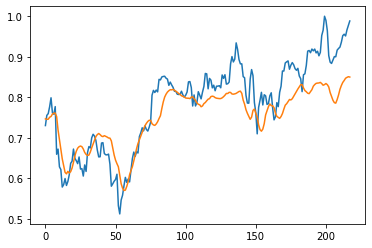

In [13]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()